In [1]:
import simweights
import pickle
import os, sys
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import pandas as pd
import tables
import h5py
import math
from scipy.stats import mstats
import matplotlib as mpl
import matplotlib.font_manager as font_manager


In [2]:
sys.path.append('/data/user/tvaneede/GlobalFit/reco_processing/notebooks/weighting')

from datasets import datasets

In [3]:
filetype = "NuTau_E2" # NuTau_E2

In [4]:
# astro
per_flavor_norm = 2.11
gamma_astro = 2.87

def AstroFluxModel(pdgid, energy, cos_zen):
    flux = 0.5*(per_flavor_norm*1e-18)*(energy/1e5)**-gamma_astro
    return flux

In [5]:
# ftp
file_ftp = datasets["v1_wpid"][filetype]["file_path"]
nfiles_ftp = datasets["v1_wpid"][filetype]["nfiles"]
hdf_ftp = pd.HDFStore(file_ftp,'r')
weighter_ftp = simweights.NuGenWeighter(hdf_ftp, nfiles=nfiles_ftp)
weights_ftp = weighter_ftp.get_weights( AstroFluxModel )

In [6]:
# spice 60 TeV
file_spice_track = datasets["neha_track"][ f"{filetype}_2" ]["file_path"]
nfiles_spice_track = datasets["neha_track"][ f"{filetype}_2" ]["nfiles"]
hdf_spice_track = pd.HDFStore(file_spice_track,'r')
weighter_spice_track = simweights.NuGenWeighter(hdf_spice_track, nfiles=nfiles_spice_track)
weights_spice_track = weighter_spice_track.get_weights( AstroFluxModel )

file_spice_cascade = datasets["neha_cascade"][ f"{filetype}_2" ]["file_path"]
nfiles_spice_cascade = datasets["neha_cascade"][ f"{filetype}_2" ]["nfiles"]
hdf_spice_cascade = pd.HDFStore(file_spice_cascade,'r')
weighter_spice_cascade = simweights.NuGenWeighter(hdf_spice_cascade, nfiles=nfiles_spice_track)
weights_spice_cascade = weighter_spice_cascade.get_weights( AstroFluxModel )

file_spice_doublecascade = datasets["neha_doublecascade"][ f"{filetype}_2" ]["file_path"]
nfiles_spice_doublecascade = datasets["neha_doublecascade"][ f"{filetype}_2" ]["nfiles"]
hdf_spice_doublecascade = pd.HDFStore(file_spice_doublecascade,'r')
weighter_spice_doublecascade = simweights.NuGenWeighter(hdf_spice_doublecascade, nfiles=nfiles_spice_cascade)
weights_spice_doublecascade = weighter_spice_doublecascade.get_weights( AstroFluxModel )

weighter_spice = weighter_spice_track + weighter_spice_cascade + weighter_spice_doublecascade
weights_spice = weighter_spice.get_weights( AstroFluxModel )  


In [7]:
# spice all
file_spiceall_track = datasets["neha_track_AllHESE"][ f"{filetype}_2" ]["file_path"]
nfiles_spiceall_track = datasets["neha_track_AllHESE"][ f"{filetype}_2" ]["nfiles"]
hdf_spiceall_track = pd.HDFStore(file_spiceall_track,'r')
weighter_spiceall_track = simweights.NuGenWeighter(hdf_spiceall_track, nfiles=nfiles_spiceall_track)
weights_spiceall_track = weighter_spiceall_track.get_weights( AstroFluxModel )

file_spiceall_cascade = datasets["neha_cascade_AllHESE"][ f"{filetype}_2" ]["file_path"]
nfiles_spiceall_cascade = datasets["neha_cascade_AllHESE"][ f"{filetype}_2" ]["nfiles"]
hdf_spiceall_cascade = pd.HDFStore(file_spiceall_cascade,'r')
weighter_spiceall_cascade = simweights.NuGenWeighter(hdf_spiceall_cascade, nfiles=nfiles_spiceall_track)
weights_spiceall_cascade = weighter_spiceall_cascade.get_weights( AstroFluxModel )

file_spiceall_doublecascade = datasets["neha_doublecascade_AllHESE"][ f"{filetype}_2" ]["file_path"]
nfiles_spiceall_doublecascade = datasets["neha_doublecascade_AllHESE"][ f"{filetype}_2" ]["nfiles"]
hdf_spiceall_doublecascade = pd.HDFStore(file_spiceall_doublecascade,'r')
weighter_spiceall_doublecascade = simweights.NuGenWeighter(hdf_spiceall_doublecascade, nfiles=nfiles_spiceall_cascade)
weights_spiceall_doublecascade = weighter_spiceall_doublecascade.get_weights( AstroFluxModel )

weighter_spiceall = weighter_spiceall_track + weighter_spiceall_cascade + weighter_spiceall_doublecascade
weights_spiceall = weighter_spiceall.get_weights( AstroFluxModel )  


In [8]:
# spice thijs
file_spicethijs_doublecascade = datasets["thijs_doublecascade"][ f"{filetype}_2" ]["file_path"]
nfiles_spicethijs_doublecascade = datasets["thijs_doublecascade"][ f"{filetype}_2" ]["nfiles"]
hdf_spicethijs_doublecascade = pd.HDFStore(file_spicethijs_doublecascade,'r')
weighter_spicethijs_doublecascade = simweights.NuGenWeighter(hdf_spicethijs_doublecascade, nfiles=nfiles_spicethijs_doublecascade)
weights_spicethijs_doublecascade = weighter_spicethijs_doublecascade.get_weights( AstroFluxModel )


Lets first check if I made a proper iteration of Neha's files, with RecoETot > 60 TeV

neha 6.202200332715688e-09
<class 'pandas.io.pytables.HDFStore'>
File path: /data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/NoDeepCore/22085_DoubleCascades.hdf5

thijs 6.202200332715688e-09
<class 'pandas.io.pytables.HDFStore'>
File path: /data/user/tvaneede/datasets/taupede/SnowStorm/NoDeepCore/hdf_files/RecowithBfr/Baseline/22085/22085_DoubleCascades.hdf5



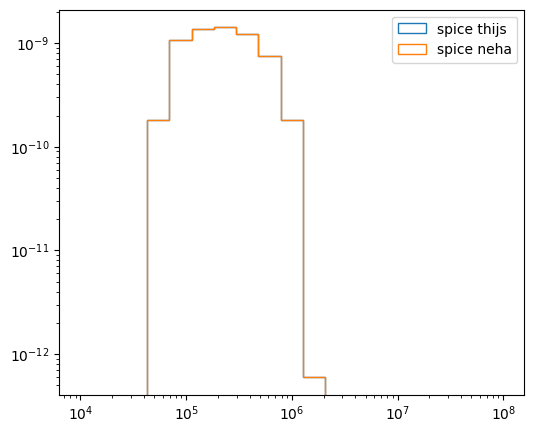

In [10]:
# plot RecoETot
variable = "RecoETot"
bins = np.geomspace( 1e4, 1e8, 20 )

fig, ax = plt.subplots(1, 1,figsize =(6,5))

ax.hist(hdf_spicethijs_doublecascade["RecoETot"].value.values, weights=weights_spicethijs_doublecascade, bins=bins, histtype="step", label=f"spice thijs")
ax.hist(hdf_spice_doublecascade["RecoETot"].value.values, weights=weights_spice_doublecascade, bins=bins, histtype="step", label=f"spice neha")

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

print( "neha", sum(weights_spice_doublecascade) )
print(hdf_spice_doublecascade)
print( "thijs", sum(weights_spicethijs_doublecascade) )
print(hdf_spicethijs_doublecascade)

Now lets see if the spice neha files match if I apply the 60 TeV cut manually

spice all
min energy 20260.82374653939
entries 1849
spice 60 TeV
min energy 60945.85716667079
entries 1797
spice 60 TeV
min energy 60945.85716667079
entries 1797


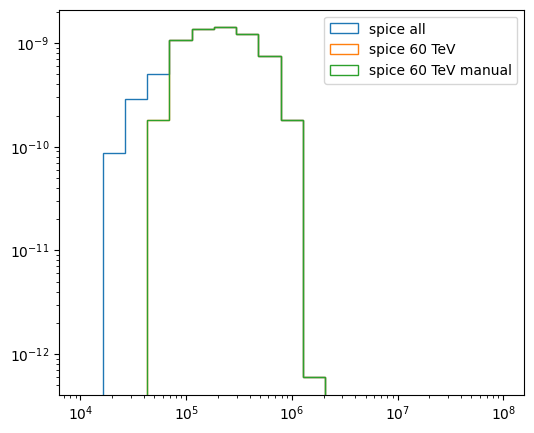

In [11]:
# plot RecoETot
variable = "RecoETot"
bins = np.geomspace( 1e4, 1e8, 20 )

fig, ax = plt.subplots(1, 1,figsize =(6,5))

# manual 60 TeV cut
RecoETot = hdf_spiceall_doublecascade["RecoETot"].value.values
weights = weights_spiceall_doublecascade
mask = RecoETot > 60000
RecoETot_cut = RecoETot[mask]
weights_cut = weights[mask]

ax.hist(hdf_spiceall_doublecascade["RecoETot"].value.values, weights=weights_spiceall_doublecascade, bins=bins, histtype="step", label=f"spice all")
ax.hist(hdf_spice_doublecascade["RecoETot"].value.values, weights=weights_spice_doublecascade, bins=bins, histtype="step", label=f"spice 60 TeV")
ax.hist(RecoETot_cut, weights=weights_cut, bins=bins, histtype="step", label=f"spice 60 TeV manual")

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

print( "spice all" )
print("min energy", min(hdf_spiceall_doublecascade["RecoETot"].value.values) )
print("entries", len(hdf_spiceall_doublecascade["RecoETot"].value.values) )
print( "spice 60 TeV" )
print("min energy", min(hdf_spice_doublecascade["RecoETot"].value.values) )
print("entries", len(hdf_spice_doublecascade["RecoETot"].value.values) )
print( "spice 60 TeV" )
print("min energy", min(RecoETot_cut) )
print("entries", len(RecoETot_cut) )

All looks consistent between Neha's files, and my reproduction of them.

Now lets introduce some ftp simulations. Lets look at some true variables.

It seems that there is a difference in HESE cut that Neha used and that I use now, or something is going wrong in the weighting.

spice all
min energy 1004.9865606755175
spice 60 TeV
min energy 60006.368188738204
ftp all
min energy 10006.03263149983


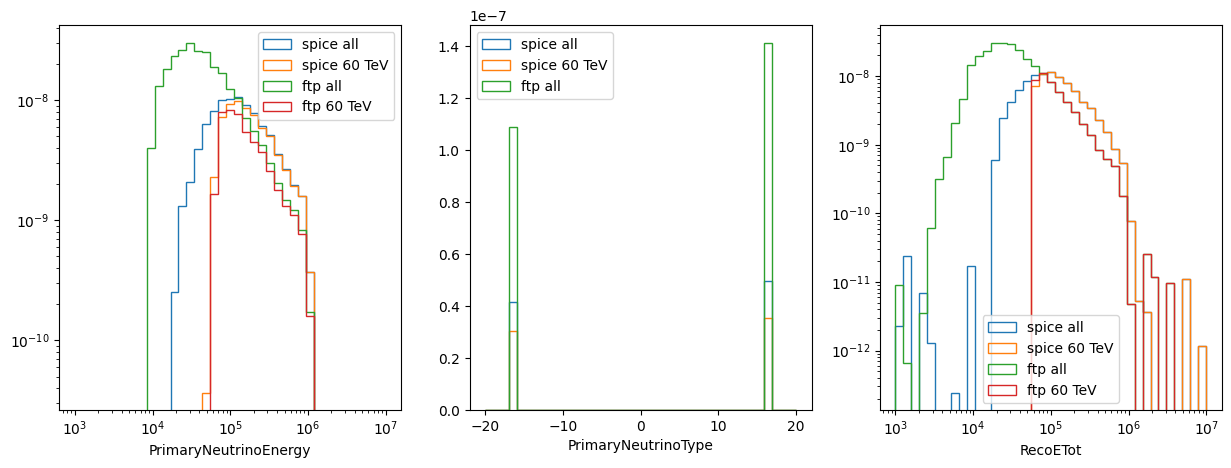

In [12]:
fig, ax = plt.subplots(1, 3,figsize =(15,5))

# PrimaryNeutrinoEnergy
variable = "PrimaryNeutrinoEnergy" # PrimaryNeutrinoEnergy PrimaryNeutrinoType
bins = np.geomspace( 1e3, 1e7, 40 )

energy_combined_spiceall = np.concatenate((hdf_spiceall_track["I3MCWeightDict"][variable].values, hdf_spiceall_cascade["I3MCWeightDict"][variable].values, hdf_spiceall_doublecascade["I3MCWeightDict"][variable].values))
weights_combined_spiceall = np.concatenate(( weights_spiceall_track, weights_spiceall_cascade, weights_spiceall_doublecascade))

# print("combining")
# print(hdf_spiceall_track)
# print(hdf_spiceall_cascade)
# print(hdf_spiceall_doublecascade)

energy_combined_spice = np.concatenate((hdf_spice_track["I3MCWeightDict"][variable].values, hdf_spice_cascade["I3MCWeightDict"][variable].values, hdf_spice_doublecascade["I3MCWeightDict"][variable].values))
weights_combined_spice = np.concatenate(( weights_spice_track, weights_spice_cascade, weights_spice_doublecascade))

# print("combining")
# print(hdf_spice_track)
# print(hdf_spice_cascade)
# print(hdf_spice_doublecascade)

# manual 60 TeV cut
RecoETot = hdf_ftp["RecoETot"].value.values
PrimaryNeutrinoEnergy = hdf_ftp["I3MCWeightDict"][variable].values
weights = weights_ftp
mask = RecoETot > 60000
RecoETot_cut = RecoETot[mask]
weights_cut = weights[mask]
PrimaryNeutrinoEnergy_cut = PrimaryNeutrinoEnergy[mask]

ax[0].hist(energy_combined_spiceall, weights=weights_combined_spiceall, bins=bins, histtype="step", label=f"spice all")
ax[0].hist(energy_combined_spice, weights=weights_combined_spice, bins=bins, histtype="step", label=f"spice 60 TeV")
ax[0].hist(hdf_ftp["I3MCWeightDict"][variable].values, weights=weights_ftp, bins=bins, histtype="step", label=f"ftp all")
ax[0].hist(PrimaryNeutrinoEnergy_cut, weights=weights_cut, bins=bins, histtype="step", label=f"ftp 60 TeV")

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel(variable)
ax[0].legend()

# PrimaryNeutrinoEnergy
variable = "PrimaryNeutrinoType" # PrimaryNeutrinoEnergy PrimaryNeutrinoType
bins = np.linspace( -20, 20, 40 )

energy_combined_spiceall = np.concatenate((hdf_spiceall_track["I3MCWeightDict"][variable].values, hdf_spiceall_cascade["I3MCWeightDict"][variable].values, hdf_spiceall_doublecascade["I3MCWeightDict"][variable].values))
weights_combined_spiceall = np.concatenate(( weights_spiceall_track, weights_spiceall_cascade, weights_spiceall_doublecascade))

energy_combined_spice = np.concatenate((hdf_spice_track["I3MCWeightDict"][variable].values, hdf_spice_cascade["I3MCWeightDict"][variable].values, hdf_spice_doublecascade["I3MCWeightDict"][variable].values))
weights_combined_spice = np.concatenate(( weights_spice_track, weights_spice_cascade, weights_spice_doublecascade))

ax[1].hist(energy_combined_spiceall, weights=weights_combined_spiceall, bins=bins, histtype="step", label=f"spice all")
ax[1].hist(energy_combined_spice, weights=weights_combined_spice, bins=bins, histtype="step", label=f"spice 60 TeV")
ax[1].hist(hdf_ftp["I3MCWeightDict"][variable].values, weights=weights_ftp, bins=bins, histtype="step", label=f"ftp all")

ax[1].set_xlabel(variable)
ax[1].legend()

# RecoETot
variable = "RecoETot" 
bins = np.geomspace( 1e3, 1e7, 40 )

energy_combined_spiceall = np.concatenate((hdf_spiceall_track[variable].value.values, hdf_spiceall_cascade[variable].value.values, hdf_spiceall_doublecascade[variable].value.values))
weights_combined_spiceall = np.concatenate(( weights_spiceall_track, weights_spiceall_cascade, weights_spiceall_doublecascade))

energy_combined_spice = np.concatenate((hdf_spice_track[variable].value.values, hdf_spice_cascade[variable].value.values, hdf_spice_doublecascade[variable].value.values))
weights_combined_spice = np.concatenate(( weights_spice_track, weights_spice_cascade, weights_spice_doublecascade))

ax[2].hist(energy_combined_spiceall, weights=weights_combined_spiceall, bins=bins, histtype="step", label=f"spice all")
ax[2].hist(energy_combined_spice, weights=weights_combined_spice, bins=bins, histtype="step", label=f"spice 60 TeV")
ax[2].hist(hdf_ftp[variable].value.values, weights=weights_ftp, bins=bins, histtype="step", label=f"ftp all")
ax[2].hist(RecoETot_cut, weights=weights_cut, bins=bins, histtype="step", label=f"ftp 60 TeV")

ax[2].set_xscale("log")
ax[2].set_yscale("log")
ax[2].set_xlabel(variable)
ax[2].legend()


print( "spice all" )
print("min energy", min(energy_combined_spiceall) )
print( "spice 60 TeV" )
print("min energy", min(energy_combined_spice) )
print( "ftp all" )
print("min energy", min(hdf_ftp["I3MCWeightDict"]["PrimaryNeutrinoEnergy"].values) )


I know the problem, or at least one of the problems. The CausalQtot cut is much lower for the flag I am using now.

total ratio 2.0560148629134813


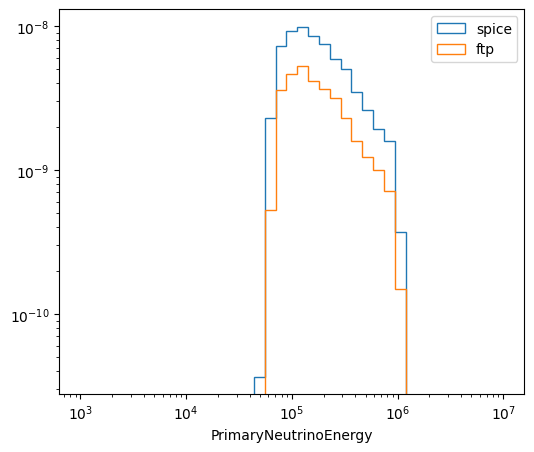

In [13]:
fig, ax = plt.subplots(1, 1,figsize =(6,5))

# PrimaryNeutrinoEnergy
variable = "PrimaryNeutrinoEnergy" # PrimaryNeutrinoEnergy PrimaryNeutrinoType
bins = np.geomspace( 1e3, 1e7, 40 )

energy_combined_spiceall = np.concatenate((hdf_spiceall_track["I3MCWeightDict"][variable].values, hdf_spiceall_cascade["I3MCWeightDict"][variable].values, hdf_spiceall_doublecascade["I3MCWeightDict"][variable].values))
weights_combined_spiceall = np.concatenate(( weights_spiceall_track, weights_spiceall_cascade, weights_spiceall_doublecascade))

energy_combined_spice = np.concatenate((hdf_spice_track["I3MCWeightDict"][variable].values, hdf_spice_cascade["I3MCWeightDict"][variable].values, hdf_spice_doublecascade["I3MCWeightDict"][variable].values))
weights_combined_spice = np.concatenate(( weights_spice_track, weights_spice_cascade, weights_spice_doublecascade))

# manual 60 TeV and casualQtot cut
RecoETot = hdf_ftp["RecoETot"].value.values
HESE_CausalQTot = hdf_ftp["HESE_CausalQTot"].value.values
PrimaryNeutrinoEnergy = hdf_ftp["I3MCWeightDict"][variable].values
weights = weights_ftp
mask = (RecoETot > 60000) & (HESE_CausalQTot > 6000)
weights_cut = weights[mask]
PrimaryNeutrinoEnergy_cut = PrimaryNeutrinoEnergy[mask]

ax.hist(energy_combined_spice, weights=weights_combined_spice, bins=bins, histtype="step", label=f"spice")
ax.hist(PrimaryNeutrinoEnergy_cut, weights=weights_cut, bins=bins, histtype="step", label=f"ftp")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(variable)
ax.legend()

print("total ratio", sum(weights_combined_spice)/sum(weights_cut))

I created two new hdf5 files using my new method of 1000 files of NuTau E2 for spice and ftp, where ftp is without any cuts! continue in debug_spice_ftp_part2